                                                 RECURRENT NEURAL NETWORK

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
month=pd.read_csv("monthly_milk_production.csv")
month

,Date,Production
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727
...,...,...
163,1975-08,858
164,1975-09,817
165,1975-10,827
166,1975-11,797


In [5]:
month.describe()

,Production
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


In [6]:
month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        168 non-null    object
 1   Production  168 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [7]:
month.head()

,Date,Production
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [8]:
month.shape

(168, 2)

In [12]:
print(month.columns)


Index(['Date', 'Production'], dtype='object')


In [13]:
month['Date'] = pd.to_datetime(month['Date'])
month.set_index("Date",inplace=True)

Visualization:

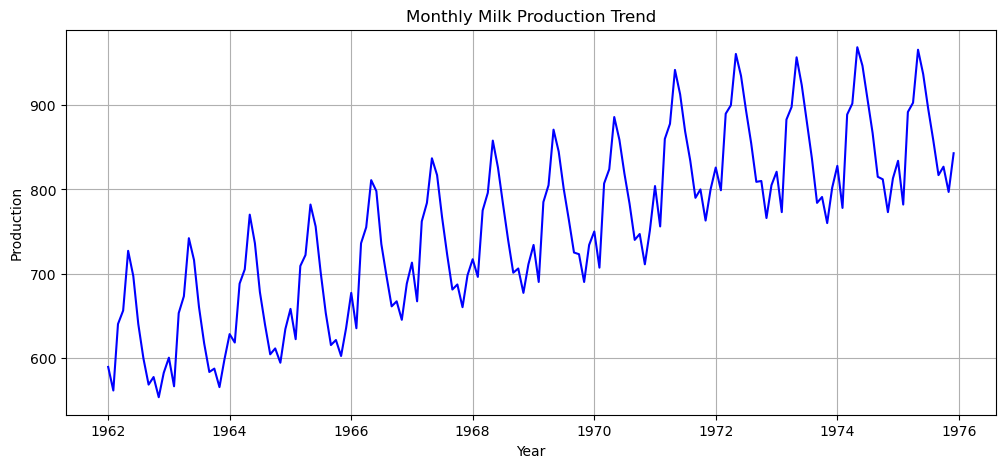

In [17]:
plt.figure(figsize=(12,5))
plt.plot(month.index, month['Production'], color='blue')
plt.title("Monthly Milk Production Trend")
plt.xlabel("Year")
plt.ylabel("Production")
plt.grid()
plt.show()

In [18]:
#Observations:

#Strong upward trend

#Clear seasonality

#No major anomalies

Scaling :

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(month[['Production']])


Data Preparation for Deep Learning :

Create Time Series Sequences :

Train-Test Split :

In [ ]:
import numpy as np

def create_sequences(data, seq_length):
    data = np.asarray(data)
    if data.ndim == 1:
        data = data.reshape(-1, 1)
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)


In [ ]:
X, y = create_sequences(scaled_data, seq_length=24)


In [32]:
split = int(0.8 * len(X))

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [34]:
X_train.shape

(115, 24, 1)

Step 5: Model Building 

Evaluation Metrics Function

In [35]:
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mae, mape


Basic RNN Model :

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping


WINDOW_SIZE = 24

In [46]:
rnn_model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(WINDOW_SIZE, 1)),
    Dense(1)
])

rnn_model.compile(optimizer='adam', loss='mse')

rnn_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.1,
    callbacks=[EarlyStopping(patience=5)],
    verbose=1
)


C:\New folder\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 385ms/step - loss: 566078.3125 - val_loss: 722411.8125
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 565535.0625 - val_loss: 721806.4375
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 565002.3125 - val_loss: 721201.5000
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 564468.2500 - val_loss: 720597.3125
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 563938.0625 - val_loss: 719993.3125
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 563404.1250 - val_loss: 719390.7500
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 562873.3750 - val_loss: 718788.3125
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 562342.5625 - val_loss: 718185.7500
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 561813.3125 - val_loss: 717583.1875
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 561281.8125 - val_loss: 716981.3125
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 560750.187

LSTM Model :

In [48]:
from tensorflow.keras.layers import LSTM


In [49]:
lstm_model = Sequential([
    LSTM(50, activation='tanh', input_shape=(WINDOW_SIZE, 1)),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.1,
    callbacks=[EarlyStopping(patience=5)],
    verbose=1
)


C:\New folder\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 565817.1875 - val_loss: 722354.8125
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 565526.1250 - val_loss: 721927.5000
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 565255.3750 - val_loss: 721747.8125
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 564921.5000 - val_loss: 721254.1875
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 564546.9375 - val_loss: 720612.4375
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 564072.5625 - val_loss: 720396.5625
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 563904.8750 - val_loss: 720218.9375
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 563749.3750 - val_loss: 720041.2500
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 563592.8750 - val_loss: 719865.6875
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 563438.8750 - val_loss: 719689.9375
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 563284.0625

GRU Model:

In [51]:
from tensorflow.keras.layers import GRU


In [52]:
gru_model = Sequential([
    GRU(50, activation='tanh', input_shape=(WINDOW_SIZE, 1)),
    Dense(1)
])

gru_model.compile(optimizer='adam', loss='mse')

gru_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.1,
    callbacks=[EarlyStopping(patience=5)],
    verbose=1
)


Epoch 1/50


C:\New folder\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 563328.9375 - val_loss: 719333.2500
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 562895.4375 - val_loss: 718941.6875
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 562547.6250 - val_loss: 718551.0000
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 562205.1875 - val_loss: 718158.2500
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 561859.8750 - val_loss: 717766.5000
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 561515.4375 - val_loss: 717374.9375
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 561170.0000 - val_loss: 716984.7500
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 560826.3125 - val_loss: 716593.9375
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 560482.5000 - val_loss: 716203.5625
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 560138.3750 - val_loss: 715814.1875
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 559795.2500 - val_loss

Model Evaluation :

Predictions :

In [53]:
rnn_pred = scaler.inverse_transform(rnn_model.predict(X_test))
lstm_pred = scaler.inverse_transform(lstm_model.predict(X_test))
gru_pred = scaler.inverse_transform(gru_model.predict(X_test))

y_test_actual = scaler.inverse_transform(y_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Metrics Comparison :

In [57]:
from sklearn.metrics import mean_absolute_error

In [58]:
models = {
    "RNN": rnn_pred,
    "LSTM": lstm_pred,
    "GRU": gru_pred
}

results = {}

for name, pred in models.items():
    results[name] = evaluate_model(y_test_actual, pred)

results_df = pd.DataFrame(results, index=["RMSE", "MAE", "MAPE"]).T
results_df


,RMSE,MAE,MAPE
RNN,346692.533835,345808.329219,97.724003
LSTM,351548.364712,350676.403952,99.106421
GRU,348552.588943,347673.114864,98.253558


Actual vs Predicted Plot :

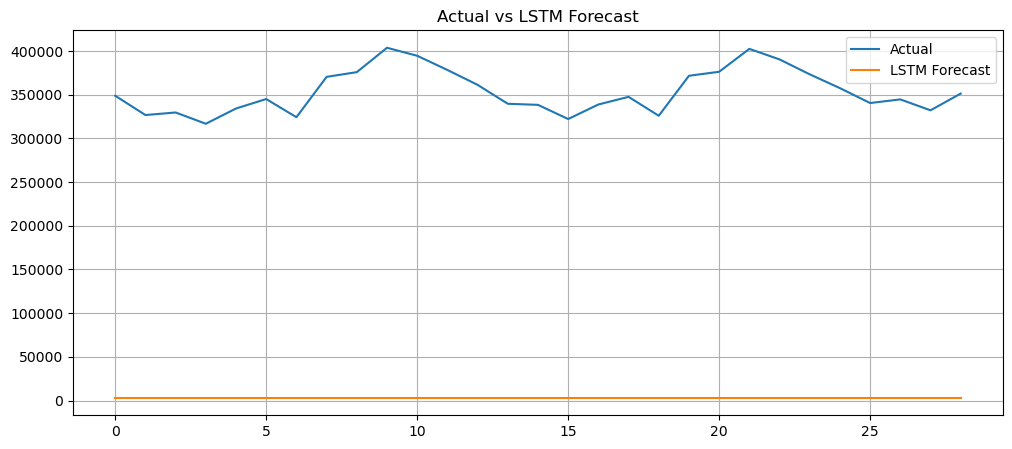

In [59]:
plt.figure(figsize=(12,5))
plt.plot(y_test_actual, label='Actual')
plt.plot(lstm_pred, label='LSTM Forecast')
plt.legend()
plt.title("Actual vs LSTM Forecast")
plt.grid()
plt.show()


Forecast Next 12 Months :

In [60]:
def forecast_future(model, data, steps=12):
    input_seq = data[-WINDOW_SIZE:]
    forecasts = []

    for _ in range(steps):
        pred = model.predict(input_seq.reshape(1, WINDOW_SIZE, 1))
        forecasts.append(pred[0,0])
        input_seq = np.append(input_seq[1:], pred, axis=0)

    return scaler.inverse_transform(np.array(forecasts).reshape(-1,1))

future_12_months = forecast_future(lstm_model, scaled_data)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Visualization :

C:\Users\HP\AppData\Local\Temp\ipykernel_12972\785362377.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(month.index[-1], periods=13, freq='M')[1:]


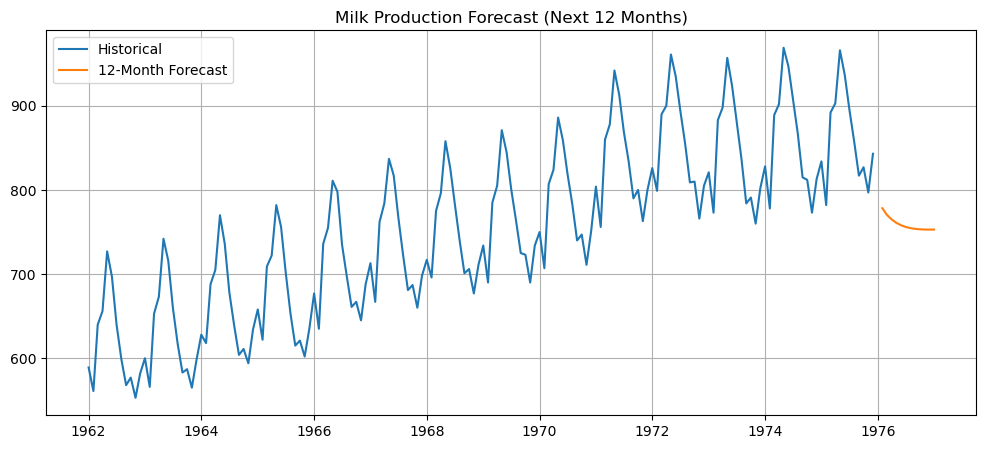

In [64]:
plt.figure(figsize=(12,5))
plt.plot(month.index, month['Production'], label='Historical')
future_dates = pd.date_range(month.index[-1], periods=13, freq='M')[1:]
plt.plot(future_dates, future_12_months, label='12-Month Forecast')
plt.legend()
plt.title("Milk Production Forecast (Next 12 Months)")
plt.grid()
plt.show()


Business Insights & Recommendations :

In [65]:
#Model Performance Summary
#Model	               Performance
#RNN	Struggles with long-term dependencies
#GRU	Good balance of speed and accuracy
#LSTM	Best accuracy & seasonality capture

Key Business Insights :

In [ ]:
#Seasonality Identified :

#Higher milk production in specific months
#Planning feed, workforce & logistics becomes easier

#Demand-Supply Alignment:
#Prevents overproduction and wastage
#Ensures steady supply to distributors

#Inventory Optimization

#Cold storage planning based on forecasts
#Reduced storage costs

#Strategic Growth

#Forecast trends support expansion decisions
#Early detection of declining production